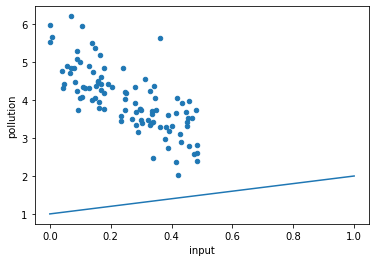

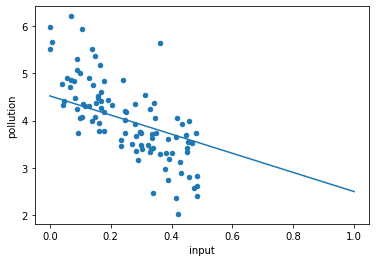

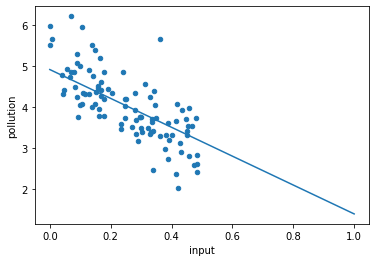

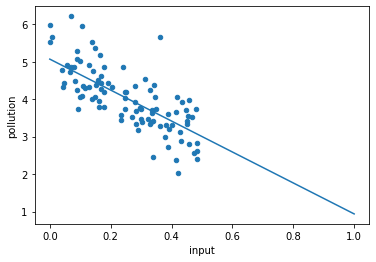

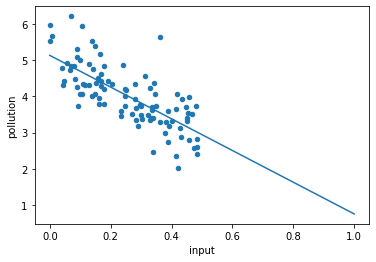

In [1]:
# 선형 회귀의 모델은 선형 방정식이고, 그 동작을 결정하는 파라미터는 직선의 기울기 W와 절편 b이다. 벡터로 표현하면 (W,b)가 파라미터 벡터가 된다.

import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

def h(x, param):
   return param[0]*x + param[1] # y_hat = wx+ b : param[0]이 w, param[1]이 b

learning_iteration = 1000 # 하이퍼파라미터 : 학습반복 횟수
learning_rate = 0.0025    # 하이퍼파라미터 : 학습율로 0.05, 0.001등이 가능

param = [1, 1] # w, b를 하나의 변수로 함

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0: # 200번 할때마다 점 찍어라
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)])
    error = ( h(x, param) - y )
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

In [2]:
# Scikit-Learn을 이용한 선형 회귀

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import linear_model  

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

In [3]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]     # 선형회귀 모델의 입력형식에 맞게 차원을 증가시킴 
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [4]:
# 사이킷런에서는 hyperparameter을 직접 설정하지 않아도 데이터를 기반으로 최적의 선형회귀 모델을 생성해준다.
regr = linear_model.LinearRegression() 
regr.fit(x,y) # 선형 회귀 모델에 데이터를 넣어 학습을 진행


LinearRegression()

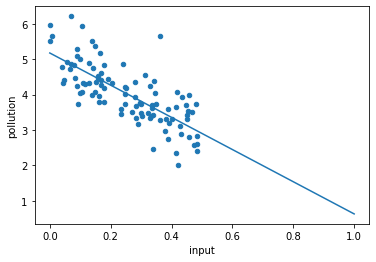

In [5]:
# 제대로 학습이 되었는지 확인을 하려면 입력으로 0과 1를 주고 해당하는 출력값을 예측하도록 하면 됨
lin_data.plot(kind = 'scatter', x = 'input', y='pollution')
y_pred = regr.predict([[0],[1]])
plt.plot([0,1],y_pred)